### Imports

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


### Distância de Minkowski

In [2]:
def calculateDist(p1, p2, n):
    return ((abs(p1[0] - p2[0])**n) + (abs(p1[1] - p2[1])**n)) ** (1/n)

* __Distância Manhattan__ __->__  n = 1

* __Distância Euclidiana__ __->__  n = 2


### Função para vizualização

Para pontos em duas dimensões

In [31]:
def plotClusters2D(clusters,n):
    
    plt.figure(figsize=(8, 8))
    colors = plt.get_cmap('Set1', len(clusters))  
    
    for i, cluster in enumerate(clusters):
        cluster_points = np.array(cluster)
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors(i), label=f'Cluster {i + 1}')
        
        #Centro do cluster
        center = np.array(cluster[0])
        plt.scatter(center[0], center[1], color='black', marker='x')
        
        #Raio
        max_dist = max([calculateDist(center, p,n) for p in cluster])
        circle = plt.Circle(center, max_dist, color=colors(i), fill=False, linestyle='--')
        plt.gca().add_patch(circle)
        plt.text(center[0], center[1] + max_dist + 0.3, f'Raio: {max_dist:.2f}', color=colors(i), ha='center')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Clusters')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()


Para pontos em três dimensões

In [32]:
def plotClusters3D(clusters, n):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    colors = plt.get_cmap('Set1', len(clusters))
    
    for i, cluster in enumerate(clusters):
        cluster_points = np.array(cluster)
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], color=colors(i), label=f'Cluster {i + 1}')
        
        # Centro do cluster
        center = np.mean(cluster_points, axis=0)
        ax.scatter(center[0], center[1], center[2], color='black', marker='x')
        
        # Raio
        max_dist = max([calculateDist(center, p, n) for p in cluster])
        
        #Nesse caso temos uma esfera e não circulo
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        x = max_dist * np.cos(u) * np.sin(v) + center[0]
        y = max_dist * np.sin(u) * np.sin(v) + center[1]
        z = max_dist * np.cos(v) + center[2]
        
        ax.plot_surface(x, y, z, color=colors(i), alpha=0.3, edgecolor='none')
        ax.text(center[0], center[1], center[2] + max_dist + 0.3, f'Raio: {max_dist:.2f}', color=colors(i), ha='center')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Clusters')
    ax.legend()
    plt.show()

Para várias dimensões a vizualização em gráficos fica inviável

In [ ]:
def printClusters(clusters,n):
    
    print(f"Clusters encontrados: {len(clusters)}")
    for i, cluster in enumerate(clusters):
        print(f"Cluster {i + 1}:")
        print(f"Pontos: {cluster}")
        max_dist = max([calculateDist(cluster[0], p,2) for p in cluster])
        print(f"Raio do Cluster: {max_dist}")

### Primeira versão do algoritmo 2-aproximado

Nessa versão  o intervalo para o raio ótimo é refinado até uma largura definida. Primeiramente vamos definir funções auxiliares para conseguir fazer o algoritmo:

In [37]:
#Função responsável por determinar se é possível dado um conjunto de pontos achar k clusters de raio maximo 2 rmax

def findSolution(pontos, rmax, k,n):
    sucess = False
    solution = []
    clusters = []
    pts = pontos[:]
    
    while pts:
        current_p = pts.pop(0)
        solution.append(current_p)
        cluster = [current_p]
        
        pts_to_remove = []
        for p in pts:
            if calculateDist(current_p, p, n) < 2 * rmax:
                cluster.append(p)
                pts_to_remove.append(p)
        
        for p in pts_to_remove:
            pts.remove(p)
        
        clusters.append(cluster)
    
    if len(solution) <= k:
        sucess = True
    
    return sucess, clusters, solution


In [38]:
#Função que acha a maior distância entre dois pontos

def maxDist(pontos,n):
    currentMax = 0
    for i, p1 in enumerate(pontos):
        for j, p2 in enumerate(pontos):
            if i != j:
                currentDist = calculateDist(p1,p2, 2) 
                if currentDist > currentMax:
                    currentMax = currentDist
    return currentMax

Agora podemos ir para a implementação do algoritmo em si:

In [42]:
def k_clusters_ref(pontos,porcentagem_largura,k_clusters,n_distancia):
    limite_superior = maxDist(pontos,n_distancia)
    limite_inferior = 0
    
    largura_total = limite_superior - limite_inferior 
    
    raio = limite_superior/2
    
    while (limite_superior-limite_inferior) >= (porcentagem_largura*largura_total):
        sucess, clusters, solution = findSolution(pontos, raio, k_clusters,n_distancia)
        if sucess:
            limite_superior = raio
            raio = limite_superior/2
        else:
            limite_inferior = raio
            raio = raio + raio/2
            
    
    return sucess, clusters, solution 

In [43]:
sucess, clusters, solution = k_clusters(pontos,0.25,3,2)

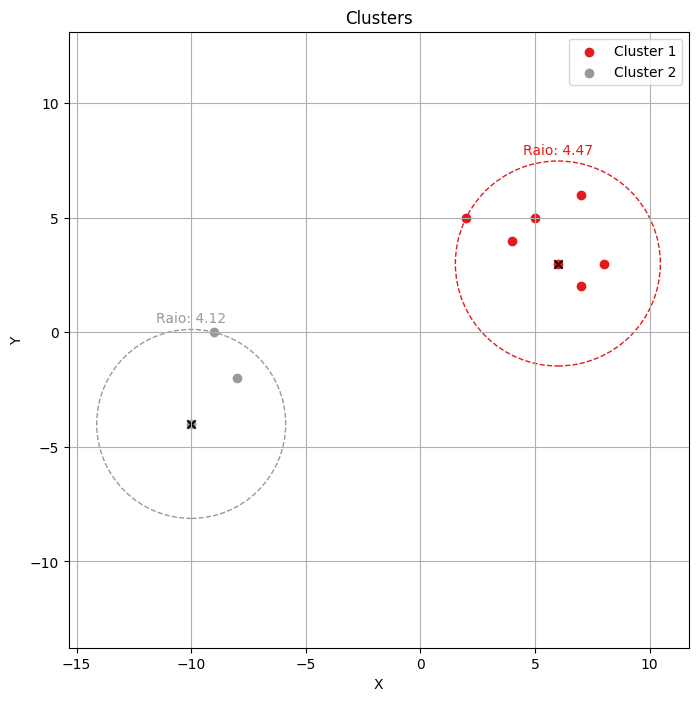

In [46]:
plotClusters2D(clusters,2)

### Segunda versão do algoritmo 2-aproximado

Nessa os centros são escolhidos para maximizar a distância entre os centros previamente escolhidos

In [ ]:
def maxDist(pontos):
    currentMax = 0
    for i, p1 in enumerate(pontos):
        for j, p2 in enumerate(pontos):
            if i != j:
                currentDist = calculateDist(p1,p2, 2) 
                if currentDist > currentMax:
                    currentMax = currentDist
    return currentMax

In [ ]:
print(maxDist(pontos))
max_inicial = maxDist(pontos)
rmax = max_inicial/2

### Testes

In [3]:
pontos = [[6, 3], [-10, -4], [-9, 0], [5, 5], [8, 3], [7, 2], [4, 4], [7, 6], [-8, -2], [2, 5]]

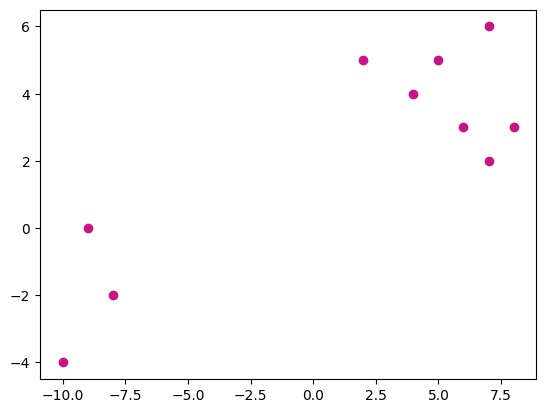

In [13]:
ptx = [p[0] for p in pontos]
pty = [p[1] for p in pontos]
plt.plot(ptx, pty, marker='o', linestyle='None', color='mediumvioletred')